In [1]:
import pandas as pd
import numpy as np
import nltk
import re
import matplotlib.pyplot as plt
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.tokenize import ToktokTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from string import punctuation
from bs4 import BeautifulSoup
questions = pd.read_csv('../data/Questions.csv', encoding = "ISO-8859-1")
answers = pd.read_csv('../data/Answers.csv', encoding = "ISO-8859-1")
tags = pd.read_csv('../data/Tags.csv', encoding = "ISO-8859-1")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sruthi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/sruthi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/sruthi/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
questions.head()

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body
0,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...
1,90,58.0,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...
2,120,83.0,2008-08-01T15:50:08Z,NaN,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...
3,180,2089740.0,2008-08-01T18:42:19Z,NaN,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...
4,260,91.0,2008-08-01T23:22:08Z,NaN,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...


In [3]:
answers.head()

,Id,OwnerUserId,CreationDate,ParentId,Score,Body
0,92,61.0,2008-08-01T14:45:37Z,90,13,"<p><a href=""http://svnbook.red-bean.com/"">Vers..."
1,124,26.0,2008-08-01T16:09:47Z,80,12,<p>I wound up using this. It is a kind of a ha...
2,199,50.0,2008-08-01T19:36:46Z,180,1,<p>I've read somewhere the human eye can't dis...
3,269,91.0,2008-08-01T23:49:57Z,260,4,"<p>Yes, I thought about that, but I soon figur..."
4,307,49.0,2008-08-02T01:49:46Z,260,28,"<p><a href=""http://www.codeproject.com/Article..."


In [4]:
tags.head()

,Id,Tag
0,80,flex
1,80,actionscript-3
2,80,air
3,90,svn
4,90,tortoisesvn


In [5]:
questions.drop(columns=['OwnerUserId', 'CreationDate', 'ClosedDate'], inplace=True)
questions.head()

,Id,Score,Title,Body
0,80,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...
1,90,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...
2,120,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...
3,180,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...
4,260,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...


In [6]:
#grouped tags with similar id in tag_df
tags['Tag'] = tags['Tag'].astype(str)
grouped_tags = tags.groupby("Id")['Tag'].apply(lambda tags: ' '.join(tags))
grouped_tags

Id
80                                 flex actionscript-3 air
90            svn tortoisesvn branch branching-and-merging
120                                    sql asp.net sitemap
180         algorithm language-agnostic colors color-space
260                c# .net scripting compiler-construction
                                 ...                      
40143210                                     php .htaccess
40143300                                   google-bigquery
40143340                            android android-studio
40143360                                 javascript vue.js
40143380                                   npm mocha babel
Name: Tag, Length: 1264216, dtype: object

In [7]:
grouped_tags.reset_index()

,Id,Tag
0,80,flex actionscript-3 air
1,90,svn tortoisesvn branch branching-and-merging
2,120,sql asp.net sitemap
3,180,algorithm language-agnostic colors color-space
4,260,c# .net scripting compiler-construction
...,...,...
1264211,40143210,php .htaccess
1264212,40143300,google-bigquery
1264213,40143340,android android-studio
1264214,40143360,javascript vue.js


In [8]:
grouped_tags_final = pd.DataFrame({'Id':grouped_tags.index, 'Tags':grouped_tags.values})
grouped_tags_final

,Id,Tags
0,80,flex actionscript-3 air
1,90,svn tortoisesvn branch branching-and-merging
2,120,sql asp.net sitemap
3,180,algorithm language-agnostic colors color-space
4,260,c# .net scripting compiler-construction
...,...,...
1264211,40143210,php .htaccess
1264212,40143300,google-bigquery
1264213,40143340,android android-studio
1264214,40143360,javascript vue.js


In [9]:
combined = questions.merge(grouped_tags_final, on='Id')
combined

,Id,Score,Title,Body,Tags
0,80,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,flex actionscript-3 air
1,90,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,svn tortoisesvn branch branching-and-merging
2,120,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...,sql asp.net sitemap
3,180,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...,algorithm language-agnostic colors color-space
4,260,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...,c# .net scripting compiler-construction
...,...,...,...,...,...
1264211,40143210,0,URL routing in PHP (MVC),<p>I am building a custom MVC project and I ha...,php .htaccess
1264212,40143300,0,Bigquery.Jobs.Insert - Resumable Upload?,<p>The API docs show that you should be able t...,google-bigquery
1264213,40143340,1,Obfuscating code in android studio,<p>Under minifyEnabled I changed from false to...,android android-studio
1264214,40143360,0,How to fire function after v-model change?,<p>I have input which I use to filter my array...,javascript vue.js


In [10]:
combined.isna().sum()

Id       0
Score    0
Title    0
Body     0
Tags     0
dtype: int64

Text(0.5, 1.0, 'Ratio of missing values per columns')

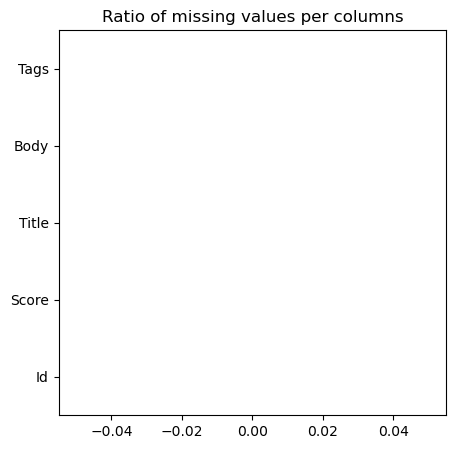

In [11]:

plt.figure(figsize=(5, 5))
combined.isna().sum().plot.barh()
plt.title("Ratio of missing values per columns")

In [12]:
print('Dupplicate entries: {}'.format(combined.duplicated().sum()))
combined.drop_duplicates(inplace = True)

Dupplicate entries: 0


In [13]:
#now we filter as per the scores
print(f"Minimum Score: {combined['Score'].min()}")
print(f"Maximum Score: {combined['Score'].max()}")
#deleting queries with score less than 3
new_question_df = combined[combined['Score'] > 3]
new_question_df

Minimum Score: -73
Maximum Score: 5190


,Id,Score,Title,Body,Tags
0,80,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,flex actionscript-3 air
1,90,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,svn tortoisesvn branch branching-and-merging
2,120,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...,sql asp.net sitemap
3,180,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...,algorithm language-agnostic colors color-space
4,260,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...,c# .net scripting compiler-construction
...,...,...,...,...,...
1263399,40123880,8,How can I force file ordering in F# projects u...,<p>I'm trying to work with vscode in my WebSha...,f# vscode
1263454,40125310,6,Why does my result data returned as void* gets...,<p>I am working in a project with a huge legac...,c++
1263609,40129230,5,Do I need to extend FirebaseInstanceIdService ...,<p>I want to manage topic subscription from th...,android firebase firebase-cloud-messaging
1263727,40132380,4,EF - Cannot apply operator '==' to operands of...,"<p>I have this generic class, which uses Entit...",c# entity-framework generics


In [14]:
new_question_df.drop(columns=['Id', 'Score'], inplace=True)
new_question_df

/var/folders/z9/336qkncn48l4v8c1qftlly8r0000gn/T/ipykernel_78857/1059286277.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_question_df.drop(columns=['Id', 'Score'], inplace=True)


,Title,Body,Tags
0,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,flex actionscript-3 air
1,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,svn tortoisesvn branch branching-and-merging
2,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...,sql asp.net sitemap
3,Function for creating color wheels,<p>This is something I've pseudo-solved many t...,algorithm language-agnostic colors color-space
4,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...,c# .net scripting compiler-construction
...,...,...,...
1263399,How can I force file ordering in F# projects u...,<p>I'm trying to work with vscode in my WebSha...,f# vscode
1263454,Why does my result data returned as void* gets...,<p>I am working in a project with a huge legac...,c++
1263609,Do I need to extend FirebaseInstanceIdService ...,<p>I want to manage topic subscription from th...,android firebase firebase-cloud-messaging
1263727,EF - Cannot apply operator '==' to operands of...,"<p>I have this generic class, which uses Entit...",c# entity-framework generics


In [15]:
new_question_df['Tags'] = new_question_df['Tags'].apply(lambda x: x.split())
print(new_question_df)
unique_tags = list(set([item for sublist in new_question_df['Tags'].values for item in sublist]))

len(unique_tags)

                                                     Title  \
0        SQLStatement.execute() - multiple queries in o...   
1        Good branching and merging tutorials for Torto...   
2                                        ASP.NET Site Maps   
3                       Function for creating color wheels   
4        Adding scripting functionality to .NET applica...   
...                                                    ...   
1263399  How can I force file ordering in F# projects u...   
1263454  Why does my result data returned as void* gets...   
1263609  Do I need to extend FirebaseInstanceIdService ...   
1263727  EF - Cannot apply operator '==' to operands of...   
1264205       What exactly makes a type system consistent?   

                                                      Body  \
0        <p>I've written a database generation script i...   
1        <p>Are there any really good tutorials explain...   
2        <p>Has anyone got experience creating <strong>...   
3      

/var/folders/z9/336qkncn48l4v8c1qftlly8r0000gn/T/ipykernel_78857/1713968732.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_question_df['Tags'] = new_question_df['Tags'].apply(lambda x: x.split())


19085

In [16]:
flat_list = [item for sublist in new_question_df['Tags'].values for item in sublist]
keywords = nltk.FreqDist(flat_list)
keywords = nltk.FreqDist(keywords)
sum(keywords.values())

389745

In [17]:
flat_list = [item for sublist in new_question_df['Tags'].values for item in sublist]
keywords = nltk.FreqDist(flat_list)
frequencies_words = keywords.most_common(100)
tags_features = [word[0] for word in frequencies_words]
tags_features

['c#',
 'java',
 'javascript',
 'android',
 'python',
 'c++',
 'php',
 'jquery',
 'ios',
 '.net',
 'html',
 'css',
 'c',
 'objective-c',
 'iphone',
 'ruby-on-rails',
 'sql',
 'asp.net',
 'mysql',
 'ruby',
 'r',
 'asp.net-mvc',
 'sql-server',
 'linux',
 'git',
 'angularjs',
 'django',
 'node.js',
 'arrays',
 'algorithm',
 'wpf',
 'performance',
 'xcode',
 'string',
 'regex',
 'eclipse',
 'windows',
 'multithreading',
 'scala',
 'json',
 'haskell',
 'xml',
 'html5',
 'osx',
 'swift',
 'c++11',
 'database',
 'spring',
 'visual-studio',
 'unit-testing',
 'ajax',
 'bash',
 'delphi',
 'linq',
 'winforms',
 'ruby-on-rails-3',
 'perl',
 'visual-studio-2010',
 'entity-framework',
 'generics',
 'mongodb',
 'debugging',
 'oracle',
 'cocoa',
 'security',
 'hibernate',
 'css3',
 'list',
 'templates',
 'cocoa-touch',
 'postgresql',
 'image',
 'facebook',
 'google-chrome',
 'qt',
 'oop',
 'twitter-bootstrap',
 'asp.net-mvc-3',
 'shell',
 'numpy',
 'vim',
 'rest',
 'swing',
 'maven',
 'gcc',
 'matlab'

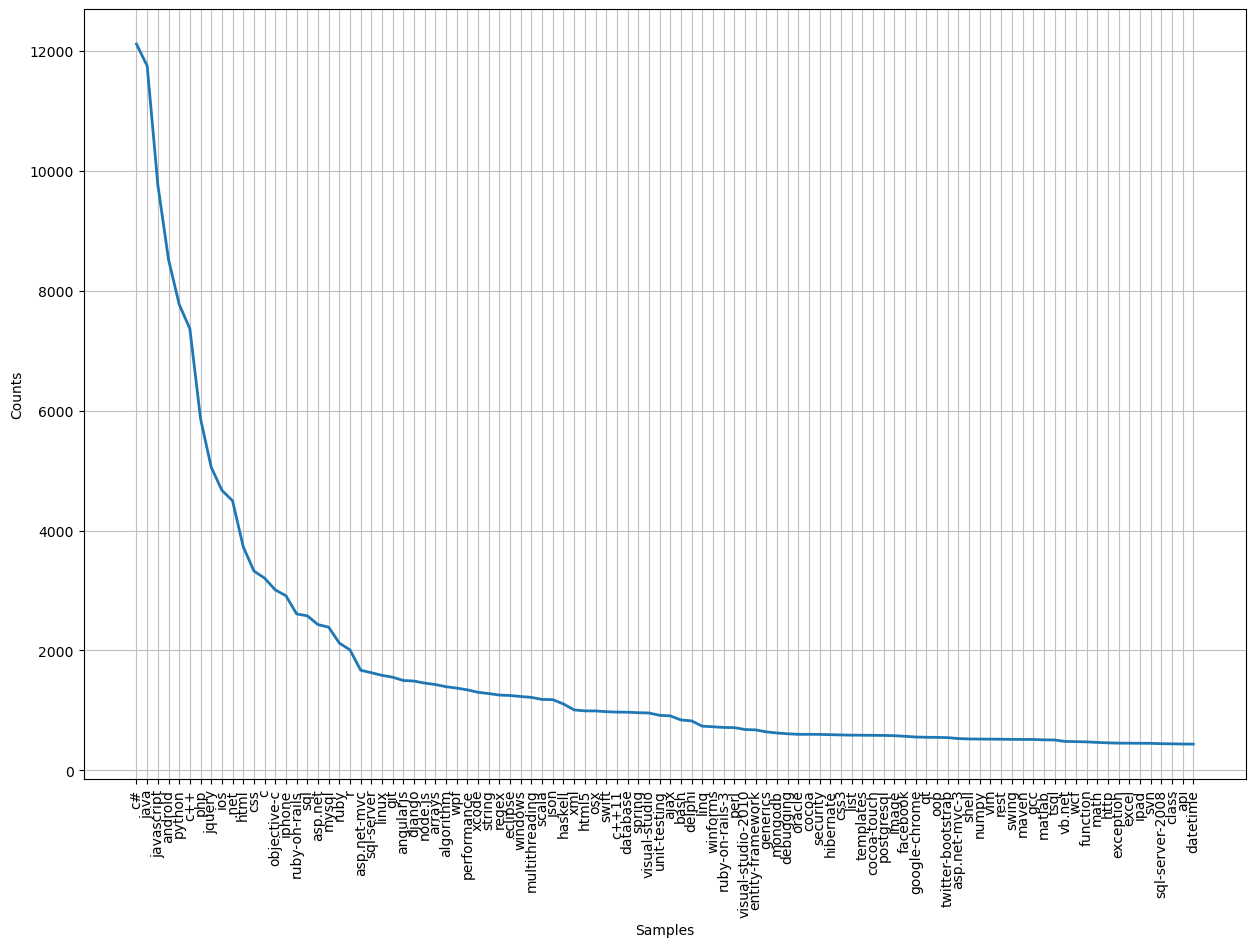

<Axes: xlabel='Samples', ylabel='Counts'>

In [18]:
fig, ax = plt.subplots(figsize=(15, 10))
keywords.plot(100, cumulative=False)

In [19]:
def most_common(tags):
    tags_filtered = []
    for i in range(len(tags)):
        if tags[i] in tags_features:
            tags_filtered.append(tags[i])
    return tags_filtered

In [20]:
new_question_df['Tags'] = new_question_df['Tags'].apply(lambda x: most_common(x))
new_question_df['Tags'] = new_question_df['Tags'].apply(lambda x: x if len(x) > 0 else None)
new_question_df.dropna(subset=['Tags'], inplace=True)
new_question_df

/var/folders/z9/336qkncn48l4v8c1qftlly8r0000gn/T/ipykernel_78857/3223676313.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_question_df['Tags'] = new_question_df['Tags'].apply(lambda x: most_common(x))
/var/folders/z9/336qkncn48l4v8c1qftlly8r0000gn/T/ipykernel_78857/3223676313.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_question_df['Tags'] = new_question_df['Tags'].apply(lambda x: x if len(x) > 0 else None)
/var/folders/z9/336qkncn48l4v8c1qftlly8r0000gn/T/ipykernel_78857/3223676313.py:3:

,Title,Body,Tags
1,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,[svn]
2,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...,"[sql, asp.net]"
3,Function for creating color wheels,<p>This is something I've pseudo-solved many t...,[algorithm]
4,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...,"[c#, .net]"
5,Should I use nested classes in this case?,<p>I am working on a collection of classes use...,"[c++, oop, class]"
...,...,...,...
1263337,How to find the running time of these two func...,<p>I'm familiar with the big O notation and th...,"[java, algorithm]"
1263454,Why does my result data returned as void* gets...,<p>I am working in a project with a huge legac...,[c++]
1263609,Do I need to extend FirebaseInstanceIdService ...,<p>I want to manage topic subscription from th...,[android]
1263727,EF - Cannot apply operator '==' to operands of...,"<p>I have this generic class, which uses Entit...","[c#, entity-framework, generics]"


Text processing:

Removing html format

Lowering text

Transforming abbreviations

Removing punctuation (but keeping words like c# since it's the most popular tag)

Lemmatizing words

Removing stop words

In [21]:
# Converting html to text in the body
new_question_df['Body'] = [BeautifulSoup(text).get_text() for text in new_question_df['Body'] ]

/var/folders/z9/336qkncn48l4v8c1qftlly8r0000gn/T/ipykernel_78857/3303261477.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_question_df['Body'] = [BeautifulSoup(text).get_text() for text in new_question_df['Body'] ]


In [22]:
def clean_text(text):
    text = text.lower()
    text = text.strip(' ')
    return text

token = ToktokTokenizer()
punct = '!"#$%&\'()*+,./:;<=>?@[\\]^_`{|}~'
lemma = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

def strip_list_noempty(mylist):
    newlist = (item.strip() if hasattr(item, 'strip') else item for item in mylist)
    return [item for item in newlist if item != '']

def clean_punct(text): 
    words = token.tokenize(text)
    punctuation_filtered = []
    regex = re.compile('[%s]' % re.escape(punct))
    remove_punctuation = str.maketrans(' ', ' ', punct)
    for w in words:
        if w in tags_features:
            punctuation_filtered.append(w)
        else:
            punctuation_filtered.append(regex.sub('', w))
    filtered_list = strip_list_noempty(punctuation_filtered)
    return ' '.join(map(str, filtered_list))
def lemmatizeWords(text):
    words = token.tokenize(text)
    listLemma = []
    for w in words:
        x = lemma.lemmatize(w, pos="v")
        listLemma.append(x)
    return ' '.join(map(str, listLemma))

def stopWordsRemove(text):
    stop_words = set(stopwords.words("english"))
    words = token.tokenize(text)
    filtered = [w for w in words if not w in stop_words]
    return ' '.join(map(str, filtered))

In [23]:
# Remove stopwords, punctuation and lemmatize for text in body
new_question_df['Body'] = new_question_df['Body'].apply(lambda x: clean_text(x)) 
new_question_df['Body'] = new_question_df['Body'].apply(lambda x: clean_punct(x)) 
new_question_df['Body'] = new_question_df['Body'].apply(lambda x: lemmatizeWords(x))
new_question_df['Body'] = new_question_df['Body'].apply(lambda x: stopWordsRemove(x))


# Remove stopwords, punctuation and lemmatize for title.
new_question_df['Title'] = new_question_df['Title'].apply(lambda x: str(x))
new_question_df['Title'] = new_question_df['Title'].apply(lambda x: clean_text(x)) 
new_question_df['Title'] = new_question_df['Title'].apply(lambda x: clean_punct(x)) 
new_question_df['Title'] = new_question_df['Title'].apply(lambda x: lemmatizeWords(x)) 
new_question_df['Title'] = new_question_df['Title'].apply(lambda x: stopWordsRemove(x))

/var/folders/z9/336qkncn48l4v8c1qftlly8r0000gn/T/ipykernel_78857/3851487517.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_question_df['Body'] = new_question_df['Body'].apply(lambda x: clean_text(x))
/var/folders/z9/336qkncn48l4v8c1qftlly8r0000gn/T/ipykernel_78857/3851487517.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_question_df['Body'] = new_question_df['Body'].apply(lambda x: clean_punct(x))
/var/folders/z9/336qkncn48l4v8c1qftlly8r0000gn/T/ipykernel_78857/3851487517.py:4: SettingWith

In [24]:
#data is finally cleaned and preprocessed
new_question_df

,Title,Body,Tags
1,good branch merge tutorials tortoisesvn,really good tutorials explain branch merge apa...,[svn]
2,asp.net site map,anyone get experience create sql-based asp.net...,"[sql, asp.net]"
3,function create color wheel,something pseudo-solved many time never quite ...,[algorithm]
4,add script functionality .net applications,little game write c use database back-end trad...,"[c#, .net]"
5,use nest class case,work collection class use video playback recor...,"[c++, oop, class]"
...,...,...,...
1263337,find run time two function,familiar big notation run time time recognize ...,"[java, algorithm]"
1263454,result data return void get break,work project huge legacy code base try re-desi...,[c++]
1263609,need extend firebaseinstanceidservice subscrib...,want manage topic subscription client android ...,[android]
1263727,ef - cannot apply operator operands type tid tid,generic class use entity framework 6x public c...,"[c#, entity-framework, generics]"


In [25]:
new_question_df['Combined_text'] = new_question_df['Title'] + ' ' + new_question_df['Body']

/var/folders/z9/336qkncn48l4v8c1qftlly8r0000gn/T/ipykernel_78857/2805371258.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_question_df['Combined_text'] = new_question_df['Title'] + ' ' + new_question_df['Body']


In [26]:
new_question_df

,Title,Body,Tags,Combined_text
1,good branch merge tutorials tortoisesvn,really good tutorials explain branch merge apa...,[svn],good branch merge tutorials tortoisesvn really...
2,asp.net site map,anyone get experience create sql-based asp.net...,"[sql, asp.net]",asp.net site map anyone get experience create ...
3,function create color wheel,something pseudo-solved many time never quite ...,[algorithm],function create color wheel something pseudo-s...
4,add script functionality .net applications,little game write c use database back-end trad...,"[c#, .net]",add script functionality .net applications lit...
5,use nest class case,work collection class use video playback recor...,"[c++, oop, class]",use nest class case work collection class use ...
...,...,...,...,...
1263337,find run time two function,familiar big notation run time time recognize ...,"[java, algorithm]",find run time two function familiar big notati...
1263454,result data return void get break,work project huge legacy code base try re-desi...,[c++],result data return void get break work project...
1263609,need extend firebaseinstanceidservice subscrib...,want manage topic subscription client android ...,[android],need extend firebaseinstanceidservice subscrib...
1263727,ef - cannot apply operator operands type tid tid,generic class use entity framework 6x public c...,"[c#, entity-framework, generics]",ef - cannot apply operator operands type tid t...


## EDA

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import train_test_split
from scipy. sparse import hstack

In [28]:
no_topics = 20

In [29]:
X1 = new_question_df['Body']
X2 = new_question_df['Title']
y = new_question_df['Tags']
XC3 = new_question_df['Combined_text']


In [30]:
vectorizer_X1 = TfidfVectorizer(analyzer = 'word',
                                       min_df=0.0,
                                       max_df = 1.0,
                                       strip_accents = None,
                                       encoding = 'utf-8', 
                                       preprocessor=None,
                                       token_pattern=r"(?u)\S\S+",
                                       max_features=1000)

vectorizer_X2 = TfidfVectorizer(analyzer = 'word',
                                       min_df=0.0,
                                       max_df = 1.0,
                                       strip_accents = None,
                                       encoding = 'utf-8', 
                                       preprocessor=None,
                                       token_pattern=r"(?u)\S\S+",
                                       max_features=1000)

In [31]:

X1_tfidf = vectorizer_X1.fit_transform(X1)
X2_tfidf = vectorizer_X2.fit_transform(X2)
XC3_tfidf = vectorizer_X1.fit_transform(XC3)

## LDA for Body

In [32]:
lda = LatentDirichletAllocation(n_components=no_topics, max_iter=5, learning_method='online', learning_offset=50,random_state=11).fit(X1_tfidf)

In [33]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("--------------------------------------------")
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
        print("--------------------------------------------")
        

no_top_words = 10
display_topics(lda, vectorizer_X1.get_feature_names_out(), no_top_words)


--------------------------------------------
Topic 0:
15 nslog 1024 string char var useful data like asp.net
--------------------------------------------
--------------------------------------------
Topic 1:
div free varchar home scope console href init chrome javascript
--------------------------------------------
--------------------------------------------
Topic 2:
useful wpf libraries filter keep python ways ok namespace login
--------------------------------------------
--------------------------------------------
Topic 3:
fetch pass useful view like directory upload flag equivalent ideas
--------------------------------------------
--------------------------------------------
Topic 4:
select folder img def basically previous new info head notice
--------------------------------------------
--------------------------------------------
Topic 5:
play separate confuse connect click sequence point invalid go particular
--------------------------------------------
---------------------

## Data Preparation


In [34]:
X_1 = new_question_df['Body']
X_2 = new_question_df['Title']
y_label = new_question_df['Tags']
X_C3 = new_question_df['Combined_text']

multilabel_binarizer = MultiLabelBinarizer()
y_bin = multilabel_binarizer.fit_transform(y)

In [35]:
y_bin

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [36]:
vectorizer_X_1 = TfidfVectorizer(analyzer = 'word',
                                       min_df=0.0,
                                       max_df = 1.0,
                                       strip_accents = None,
                                       encoding = 'utf-8', 
                                       preprocessor=None,
                                       token_pattern=r"(?u)\S\S+",
                                       max_features=1000)

vectorizer_X_2 = TfidfVectorizer(analyzer = 'word',
                                       min_df=0.0,
                                       max_df = 1.0,
                                       strip_accents = None,
                                       encoding = 'utf-8', 
                                       preprocessor=None,
                                       token_pattern=r"(?u)\S\S+",
                                       max_features=1000)

In [37]:
X_1_tfidf = vectorizer_X_1.fit_transform(X_1)
X_2_tfidf = vectorizer_X_2.fit_transform(X_2)
X_C3_tfidf = vectorizer_X_1.fit_transform(X_C3)
X_tfidf = hstack([X_1_tfidf,X_2_tfidf])

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_bin, test_size = 0.2, random_state = 0) # Do 80/20 split

In [39]:
print("X train shape", X_train.shape)
print("y train shape", y_train.shape)
print("X test shape", X_test.shape)
print("y test shape", y_test.shape)

X train shape (87084, 2000)
y train shape (87084, 100)
X test shape (21772, 2000)
y test shape (21772, 100)


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
